[[ 1 -1  1 -1]
 [-1  1 -1  1]
 [ 1 -1  1 -1]
 [-1  1 -1  1]]
[[ 1 -1  1 -1]
 [-1  1 -1  1]
 [ 1 -1  1  1]
 [-1  1 -1  1]]
-24
Дельта равна: 8
Переходим к 5 шагу
4.5399929762484854e-05
0.35357733431470584
[[ 1 -1  1 -1]
 [-1  1 -1  1]
 [ 1 -1  1 -1]
 [-1  1 -1  1]]
-32


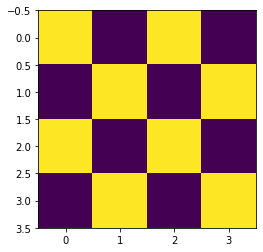

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import choice
from math import exp

def create_chessboard_matrix(size):
    matrix = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            if (i + j) % 2 == 0:
                matrix[i][j] = 1
            else:
                matrix[i][j] = -1
    return matrix

T = 0.8
size = 4

# Шаг 1
# Создаем матрицу в шахматном порядке.
matrix1 = create_chessboard_matrix(size)
print(matrix1)

# Находим сумму матрицы №1.
E1 = np.sum(matrix1 * np.roll(matrix1, shift=-1, axis=0) + np.roll(matrix1, shift=-1, axis=1) * matrix1)

# Шаг 2
# Случайным образом меняем знак случайного элемента на противоположный.
a = random.randint(0, size-1)
b = random.randint(0, size-1)
matrix2 = np.copy(matrix1)
matrix2[a][b] *= -1
print(matrix2)

# Шаг 3
# Находим сумму матрицы №2.
E2 = np.sum(matrix2 * np.roll(matrix2, shift=-1, axis=0) + np.roll(matrix2, shift=-1, axis=1) * matrix2)
print(E2)

# Шаг 4
# Находим дельту.
delta = E2 - E1
if delta <= 0:
    print('Вернуться к шагу 2')
else:
    print('Дельта равна:', delta)
    print('Переходим к 5 шагу')

# Шаг 5
# Вычисляем по формуле величину W = exp(-∆Е / T), где T- константа.
if delta > 0:
    W = exp(-delta/T)
    print(W)
    # Генерируем случайное число P в интервале (0, 1)
    P = random.random()
    print(P)

    if P <= W:
        matrix1 = np.copy(matrix2)
        E1 = E2
    else:
        matrix2 = np.copy(matrix1)

    FinalMatrix = matrix2
    E3 = E1
    print(FinalMatrix)
    print(E3)
    plt.imshow(FinalMatrix)
    plt.show()
